In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("air_quality_extended.csv" , encoding="unicode_escape")

In [6]:
df.head(15)

,Date,City,PM2.5,PM10,NO2,SO2,CO,AQI,Temperature_C,Humidity_%,Respiratory_Cases
0,2024-09-01,Delhi,174,272,65,19.6,1.03,155,37.7,51,161
1,2024-09-01,Mumbai,85,110,36,12.7,0.23,47,28.3,61,43
2,2024-09-01,Chennai,19,27,41,8.3,0.62,4,29.4,65,5
3,2024-09-01,Kolkata,101,136,47,9.2,1.46,87,25.8,66,49
4,2024-09-01,Bangalore,37,18,14,8.6,0.72,28,26.7,72,5
5,2024-09-02,Delhi,144,260,68,16.0,0.57,143,31.8,39,169
6,2024-09-02,Mumbai,98,159,33,11.1,0.90,105,28.6,68,61
7,2024-09-02,Chennai,12,105,40,8.8,0.90,33,29.1,67,52
8,2024-09-02,Kolkata,91,211,29,13.5,0.93,92,29.3,44,73
9,2024-09-02,Bangalore,41,138,20,5.6,0.35,65,28.0,70,42


In [10]:
df.sort_values(["City","Date"], inplace=True)

In [11]:
df.shape

(300, 11)

In [12]:
df.isnull().sum()

Date                 0
City                 0
PM2.5                0
PM10                 0
NO2                  0
SO2                  0
CO                   0
AQI                  0
Temperature_C        0
Humidity_%           0
Respiratory_Cases    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 4 to 296
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               300 non-null    object 
 1   City               300 non-null    object 
 2   PM2.5              300 non-null    int64  
 3   PM10               300 non-null    int64  
 4   NO2                300 non-null    int64  
 5   SO2                300 non-null    float64
 6   CO                 300 non-null    float64
 7   AQI                300 non-null    int64  
 8   Temperature_C      300 non-null    float64
 9   Humidity_%         300 non-null    int64  
 10  Respiratory_Cases  300 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 28.1+ KB


In [14]:
df.describe()

,PM2.5,PM10,NO2,SO2,CO,AQI,Temperature_C,Humidity_%,Respiratory_Cases
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,81.120000,141.426667,41.183333,11.152667,0.790433,76.986667,30.089000,62.663333,69.153333
std,51.086381,77.777519,15.555803,3.819466,0.370903,45.368205,3.586221,12.549167,55.732068
min,5.000000,10.000000,5.000000,2.000000,0.100000,0.000000,20.300000,32.000000,5.000000
25%,42.000000,86.000000,28.000000,8.200000,0.520000,44.000000,27.800000,54.000000,27.750000
50%,70.000000,124.000000,41.000000,11.100000,0.790000,68.500000,30.000000,64.000000,55.000000
75%,108.500000,188.500000,53.000000,14.000000,1.040000,102.000000,32.325000,71.250000,90.000000
max,207.000000,381.000000,80.000000,21.200000,1.780000,194.000000,40.700000,93.000000,242.000000


# Explotary data analysis


In [15]:
df.columns

Index(['Date', 'City', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'AQI',
       'Temperature_C', 'Humidity_%', 'Respiratory_Cases'],
      dtype='object')

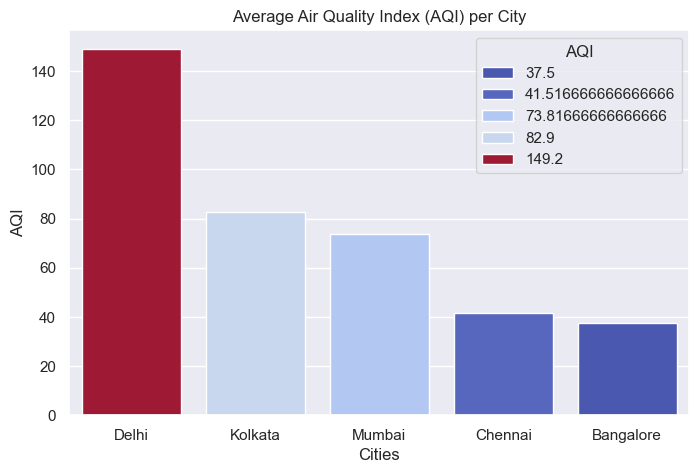

In [ ]:
#average Air quality index(AQI) per city
avg_AQI=df.groupby(["City"],as_index=False)["AQI"].mean().sort_values(by="AQI" , ascending=False)
sns.set(rc={"figure.figsize":(8,5)})
sns.barplot(data=avg_AQI, x="City" , y ="AQI" , palette="coolwarm" , hue="AQI")

plt.title("Average Air Quality Index (AQI) per City")
plt.xlabel("Cities")
plt.ylabel("AQI")
plt.show()


*so according to above graph  of AQI most polluted city is Delhi & bangalore is the cleanest *

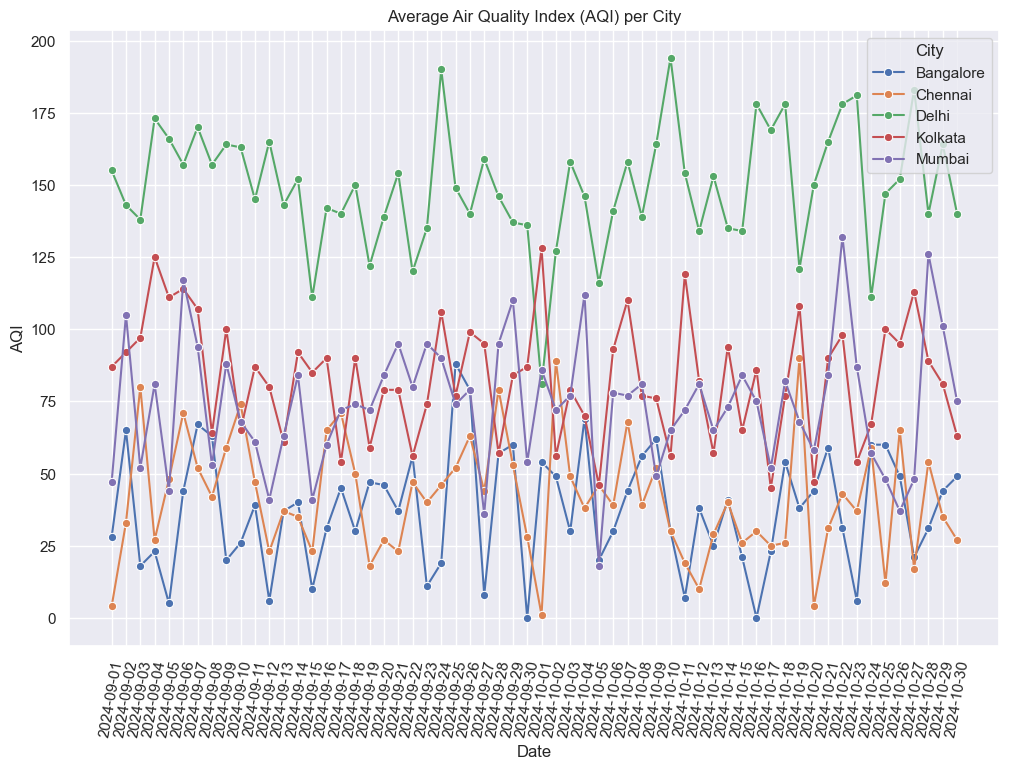

In [ ]:
# AQI trend per city
avg_AQI=df.groupby(["City"],as_index=False)["AQI"].mean().sort_values(by="AQI" , ascending=False)
sns.set(rc={"figure.figsize":(12,8)}) 
sns.lineplot(x="Date",y="AQI" , data=df, hue="City" , marker="o")
plt.title("Average Air Quality Index (AQI) per City")

plt.xticks(rotation=80)
plt.show()


* Delhi has the highest pollution trend over time, while Bangalore and Chennai show the cleanest air among the cities analyzed.*

In [43]:
df.columns

Index(['Date', 'City', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'AQI',
       'Temperature_C', 'Humidity_%', 'Respiratory_Cases'],
      dtype='object')

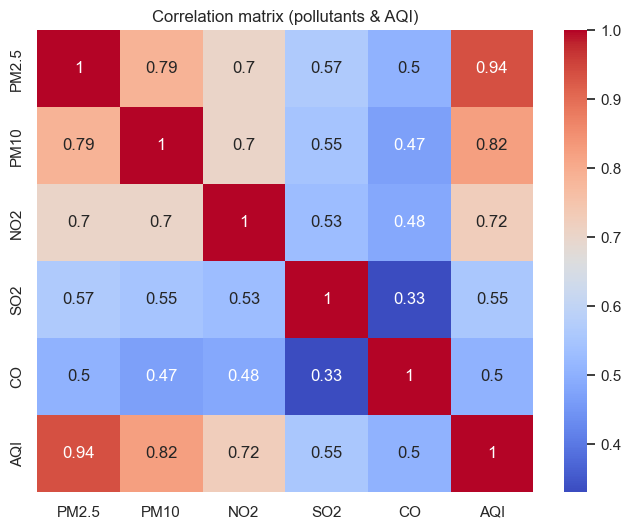

In [ ]:
# Pollutant correlation with AQI
avg_AQI=df.groupby(["City"],as_index=False)["AQI"].mean().sort_values(by="AQI" , ascending=False)
plt.figure(figsize=(8,6))
sns.heatmap(df[["PM2.5","PM10","NO2","SO2","CO","AQI"]].corr(),annot=True, cmap="coolwarm")
plt.title("Correlation matrix (pollutants & AQI)")
plt.show()


Conclusion: AQI is most strongly affected by PM2.5 and PM10 levels, indicating that particulate matter is the primary cause of poor air quality in the observed cities.

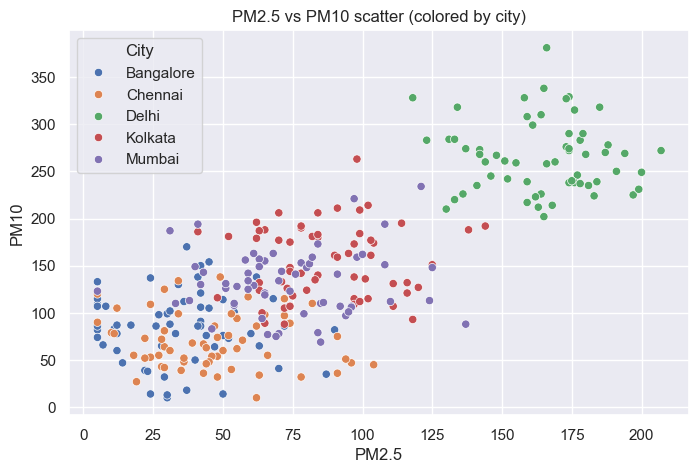

In [51]:
# PM2.5 vs PM10 scatter (colored by city)
avg_AQi=df.groupby(["City"],as_index=False)["AQI"].mean().sort_values(by="AQI" , ascending=False)
sns.set(rc={"figure.figsize":(8,5)})
sns.scatterplot(data=df,x="PM2.5" , y="PM10",hue="City")
plt.title("PM2.5 vs PM10 scatter (colored by city)")
plt.show()

PM2.5 and PM10 are positively related — as one rises, the other also increases. Delhi shows the highest concentration of both pollutants, while southern cities like bangalore and chennai have lower levels.

In [52]:
df.columns

Index(['Date', 'City', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'AQI',
       'Temperature_C', 'Humidity_%', 'Respiratory_Cases'],
      dtype='object')

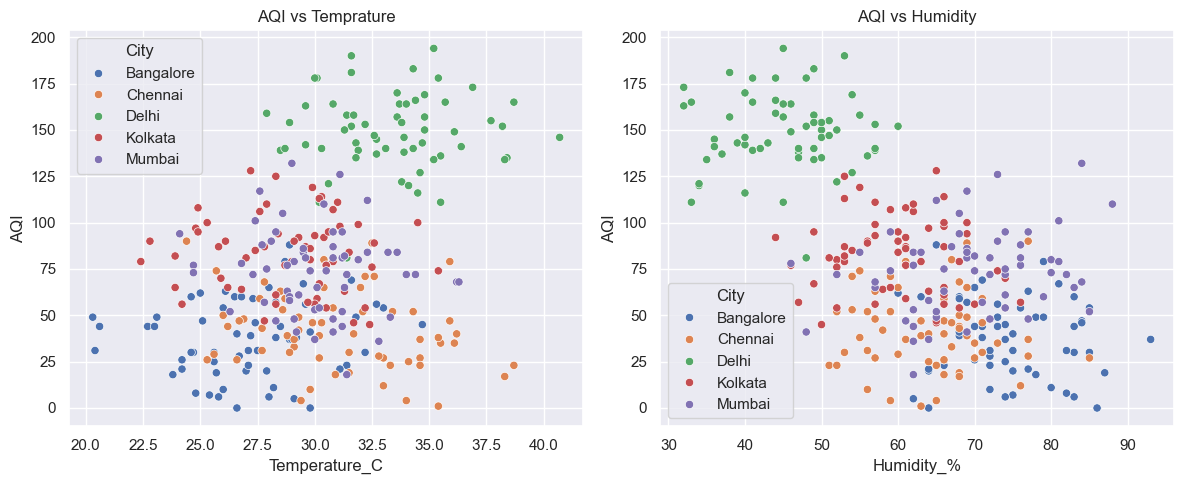

In [58]:
# <!-- AQi vs temprature and Aqi vs humidity -->
avg_AQi=df.groupby(["City"],as_index=False)["AQI"].mean().sort_values(by="AQI" , ascending=False)
sns.set(rc={"figure.figsize":(12,5)})
plt.subplot(1,2,1)
sns.scatterplot(data=df,x="Temperature_C",y="AQI",hue="City")
plt.title("AQI vs Temprature")

plt.subplot(1,2,2)
sns.scatterplot(data=df,y="AQI",x="Humidity_%",hue="City")
plt.title("AQI vs Humidity")
plt.tight_layout()
plt.show()

Delhi and Mumbai show stronger variations in AQI with weather changes, while Bangalore remains relatively stable.

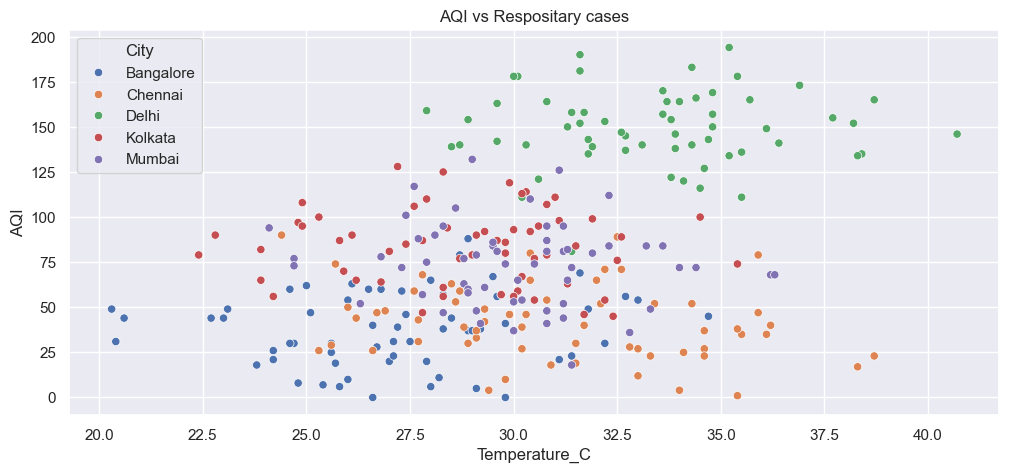

In [59]:
#AQI vs respisitory cases

avg_AQi=df.groupby(["City"],as_index=False)["AQI"].mean().sort_values(by="AQI" , ascending=False)
sns.set(rc={"figure.figsize":(12,5)})

sns.scatterplot(data=df,x="Temperature_C",y="AQI",hue="City")
plt.title("AQI vs Respositary cases")
plt.show()

you will observed that:

Cities with higher AQI (like Delhi and Mumbai) have more respiratory cases.

Cities with lower AQI (like Bangalore and Chennai) have fewer respiratory cases.

Conclusion: Delhi and Mumbai have the highest number of respiratory cases because of their high AQI levels. This shows that air pollution directly impacts human health.

AIR QUALITY ANALYSIS FINAL CONCLUSION IS:-
1) Air quality analysis across multiple Indian cities shows that Delhi and Mumbai face severe pollution, mainly due to PM2.5 and PM10 emissions.
2) Weather conditions also influence air quality, and higher AQI levels are associated with increased respiratory health issues.
Therefore, controlling vehicular emissions, promoting green zones, and monitoring AQI regularly are crucial for improving public health.